# Import all the dependencies

In [90]:
# Import list
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from dataset_generator import get_classification_bunch
from code_metric import CodeMetric

## Handling the dataset

In [91]:
classification_bunch = get_classification_bunch()
print(f"Keys of code metrics  Dataset: {classification_bunch.keys()}")


Keys of code metrics  Dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [92]:
classification_bunch.data

array([[ 15.        ,   0.        ,  30.5625    , ...,   1.        ,
          3.        ,  67.        ],
       [ 29.        ,   0.        ,  45.        , ...,   4.        ,
          3.        , 125.        ],
       [ 32.        ,   0.        ,  53.81818182, ...,   1.        ,
          2.        ,  73.        ],
       ...,
       [ 30.        ,   1.        ,  45.19230769, ...,   2.        ,
          2.        ,  77.        ],
       [ 10.        ,   1.        ,  47.        , ...,   1.        ,
          3.        ,  92.        ],
       [ 10.        ,   0.        ,  39.375     , ...,   1.        ,
          0.        ,  75.        ]])

In [93]:
classification_bunch.target

array(['FULLY_READABLE', 'QUITE_READABLE', 'QUITE_READABLE',
       'FULLY_READABLE', 'FULLY_READABLE', 'FULLY_READABLE',
       'QUITE_READABLE', 'QUITE_READABLE', 'QUITE_READABLE',
       'QUITE_READABLE', 'FULLY_READABLE', 'QUITE_READABLE',
       'QUITE_READABLE', 'QUITE_READABLE', 'NOT_VERY_READABLE',
       'FULLY_READABLE', 'QUITE_READABLE', 'FULLY_READABLE',
       'FULLY_READABLE', 'QUITE_READABLE', 'FULLY_READABLE',
       'FULLY_READABLE', 'QUITE_READABLE', 'QUITE_READABLE',
       'FULLY_READABLE', 'QUITE_READABLE', 'QUITE_READABLE',
       'NOT_VERY_READABLE', 'QUITE_READABLE', 'QUITE_READABLE',
       'QUITE_READABLE', 'FULLY_READABLE', 'FULLY_READABLE',
       'NOT_VERY_READABLE', 'FULLY_READABLE', 'NOT_VERY_READABLE',
       'QUITE_READABLE', 'FULLY_READABLE', 'FULLY_READABLE',
       'FULLY_READABLE', 'FULLY_READABLE', 'FULLY_READABLE',
       'NOT_VERY_READABLE', 'FULLY_READABLE', 'FULLY_READABLE',
       'QUITE_READABLE', 'QUITE_READABLE', 'FULLY_READABLE',
       'N

In [94]:
classification_bunch.feature_names

array(['NUMBER_OF_LINES', 'NUMBER_OF_LOOPS', 'LINE_LENGTH_MEAN',
       'COMMENTS_PER_CODE_LINE', 'PROPORTION_OF_BLANK_LINES',
       'PROPORTION_OF_GOOD_INDENTATION',
       'MAX_STREAK_OF_OPENING_PARENTHESIS',
       'MAX_STREAK_OF_FOLLOWING_PERIODS', 'LINE_LENGTH_MAX'], dtype='<U33')

In [95]:
len(np.unique(classification_bunch.target))

3

In [96]:
# X -> features, y -> label
X = classification_bunch.data
y = classification_bunch.target 
X_train, X_test, y_train, y_test = model_selection.train_test_split(classification_bunch.data, classification_bunch.target, test_size=0.20)
print(y_train)

['NOT_VERY_READABLE' 'QUITE_READABLE' 'QUITE_READABLE' 'NOT_VERY_READABLE'
 'QUITE_READABLE' 'NOT_VERY_READABLE' 'NOT_VERY_READABLE' 'FULLY_READABLE'
 'QUITE_READABLE' 'NOT_VERY_READABLE' 'QUITE_READABLE' 'NOT_VERY_READABLE'
 'NOT_VERY_READABLE' 'NOT_VERY_READABLE' 'QUITE_READABLE' 'QUITE_READABLE'
 'QUITE_READABLE' 'QUITE_READABLE' 'QUITE_READABLE' 'QUITE_READABLE'
 'NOT_VERY_READABLE' 'QUITE_READABLE' 'QUITE_READABLE' 'QUITE_READABLE'
 'QUITE_READABLE' 'NOT_VERY_READABLE' 'QUITE_READABLE' 'QUITE_READABLE'
 'NOT_VERY_READABLE' 'NOT_VERY_READABLE' 'FULLY_READABLE'
 'NOT_VERY_READABLE' 'FULLY_READABLE' 'QUITE_READABLE' 'NOT_VERY_READABLE'
 'QUITE_READABLE' 'NOT_VERY_READABLE' 'QUITE_READABLE' 'QUITE_READABLE'
 'QUITE_READABLE' 'QUITE_READABLE' 'QUITE_READABLE' 'QUITE_READABLE'
 'QUITE_READABLE' 'QUITE_READABLE' 'FULLY_READABLE' 'QUITE_READABLE'
 'QUITE_READABLE' 'QUITE_READABLE' 'FULLY_READABLE' 'NOT_VERY_READABLE'
 'QUITE_READABLE' 'QUITE_READABLE' 'QUITE_READABLE' 'FULLY_READABLE'
 'N

# Loading models 

## DecisionTrees

In [97]:
clf_dt = DecisionTreeClassifier(random_state=12345)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

accuracy_dt = clf_dt.score(X_test, y_test)
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=12345)
cv_results_dt = model_selection.cross_validate(clf_dt, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_dt_cross = np.mean(cv_results_dt['test_score'])

# Print the results
print("Decision Tree accuracy on test set: {:.3f}".format(accuracy_dt))
print("Decision Tree cross-validation accuracy: {:.3f}".format(accuracy_dt_cross))

Decision Tree accuracy on test set: 0.530
Decision Tree cross-validation accuracy: 0.551


# Confusion matrix for different models


## Decision tree

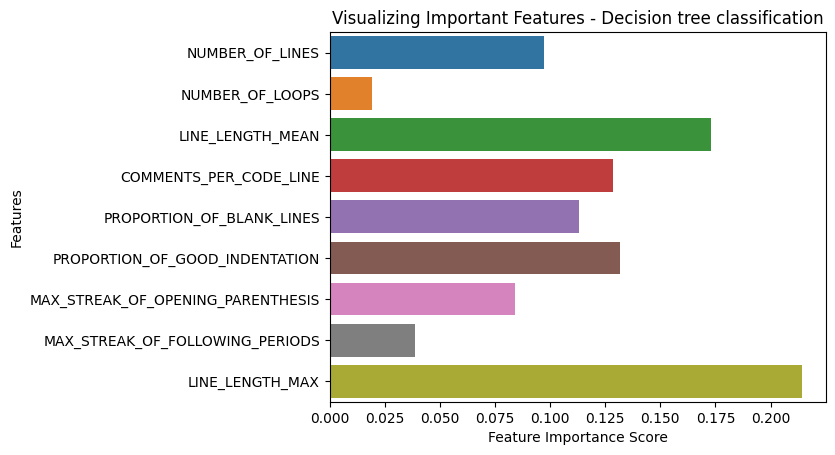

In [112]:
importance_DT = clf_dt.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_DT, y=classification_bunch.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features - Decision tree classification")
plt.show()

Confusion Matrix - decision tree :


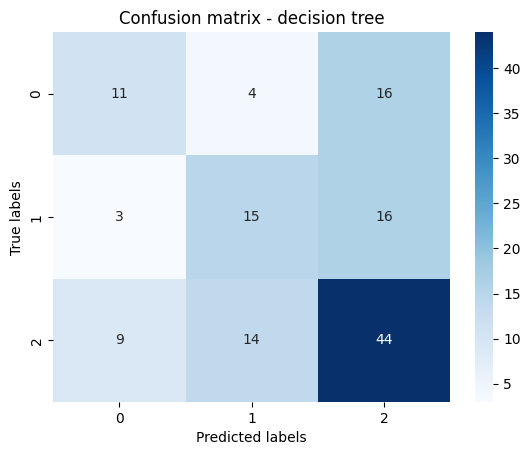

In [99]:
# Generate confusion matrix
cm_dt= confusion_matrix(y_test, y_pred_dt)

# Print confusion matrix
print("Confusion Matrix - decision tree :")
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - decision tree')
plt.show()

## LogisticRegression 

In [100]:

# Create Logistic Regression classifier
clg_lr = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial')

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
# Fit the classifier to the data
clg_lr.fit(X_train,y_train)

# Predict on the test set
lr_preds = clg_lr.predict(X_test)

# Calculate accuracy
accuracy_lr = clg_lr.score(X_test,y_test)

# Calculate cross-validation accuracy
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results_lr = model_selection.cross_validate(clg_lr, X_train, y_train, cv=kfold , scoring = 'accuracy')
accuracy_lr_cross = np.mean(cv_results_lr['test_score'])

# Print the results
print("Logistic Regression accuracy on test set: {:.3f}".format(accuracy_lr))
print("Logistic Regression cross-validation accuracy: {:.3f}".format(accuracy_lr_cross))


c:\Users\steve\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\steve\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\steve\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression accuracy on test set: 0.508
Logistic Regression cross-validation accuracy: 0.627


c:\Users\steve\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\steve\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\steve\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Confusion Matrix - logistic regression:


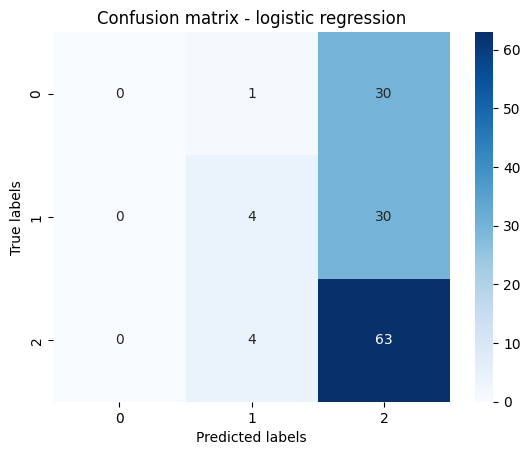

In [101]:
# confusion matrix  for linear regression 
cm_lr= confusion_matrix(y_test, lr_preds)

# Print confusion matrix
print("Confusion Matrix - logistic regression:")
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - logistic regression')
plt.show()

## Random Forest

In [102]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=12345)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = clf_rf.score(X_test, y_test)
cv_results_rf = model_selection.cross_validate(clf_rf, X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_rf_cross = np.mean(cv_results_rf['test_score'])

# Print the results
print("Random Forest accuracy on test set: {:.3f}".format(accuracy_rf))
print("Random Forest cross-validation accuracy: {:.3f}".format(accuracy_rf_cross))



Random Forest accuracy on test set: 0.614
Random Forest cross-validation accuracy: 0.661


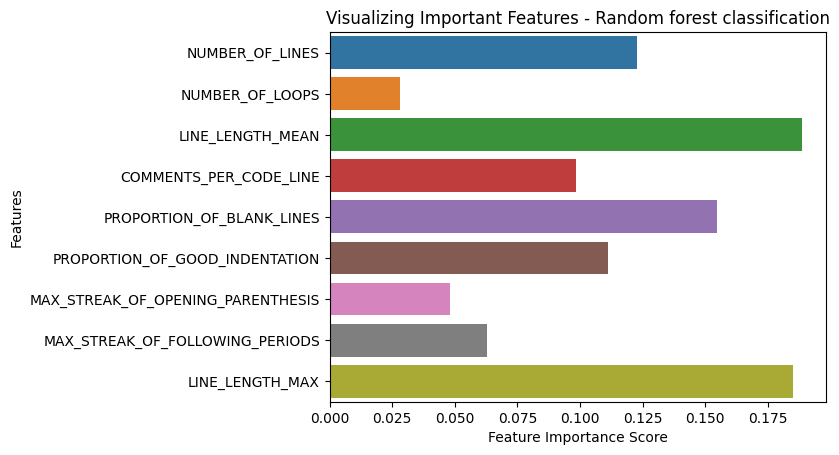

In [111]:
importance_rf = clf_rf.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_rf, y=classification_bunch.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features - Random forest classification")
plt.show()

Confusion Matrix - random forest :


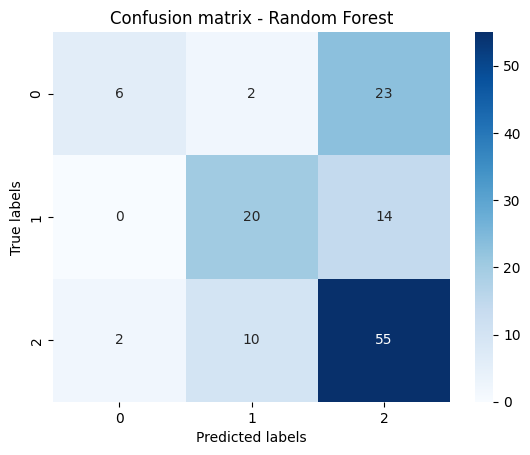

In [104]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix - random forest :")
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - Random Forest')
plt.show()

## K nearest neighbors

In [105]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=16)

# Fit the classifier to the data
knn_clf.fit(X_train, y_train)

# Predict on the test set
knn_preds = knn_clf.predict(X_test)

# Calculate accuracy
knn_accuracy = knn_clf.score(X_test, y_test)

# Calculate cross-validation accuracy
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results_knn = model_selection.cross_validate(knn_clf, X_train, y_train, cv=kfold , scoring = 'accuracy')
knn_accuracy_cross = np.mean(cv_results_knn['test_score'])

# Print results
print("KNN accuracy on test set: {:.3f}".format(knn_accuracy))
print("KNN cross-validation accuracy: {:.3f}".format(knn_accuracy_cross))



KNN accuracy on test set: 0.553
KNN cross-validation accuracy: 0.636


Confusion Matrix - KNN:


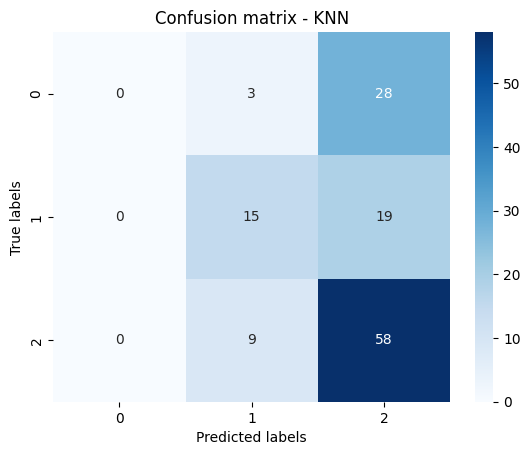

In [106]:
# confusion matrix  for linear regression 
cm_knn= confusion_matrix(y_test, knn_preds)

# Print confusion matrix
print("Confusion Matrix - KNN:")
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - KNN')
plt.show()

## Neural network

In [107]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(classification_bunch.data, classification_bunch.target, test_size=0.2, random_state=12345)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable as integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert the target variable to a one-hot encoded representation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define a function that returns the compiled neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(classification_bunch.target)), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10)

# Perform -fold cross-validation
cv_scores_nn = cross_val_score(model, X_train, y_train, cv=10)

# Print the cross-validation scores

# Train the model on the full training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = to_categorical(y_pred)
y_pred_labels = np.argmax(y_pred, axis=-1)
y_test_labels = np.argmax(y_test, axis=-1)
print("Average cross-validation score: {:.3f}".format(np.mean(cv_scores_nn)))
accuracy = accuracy_score(y_test, y_pred)
# Evaluate the model on the test set
print("Neural Network accuracy on test set: {:.3f}".format(accuracy))

Epoch 1/10


C:\Users\steve\AppData\Local\Temp\ipykernel_19520\820005148.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10)


48/48 [==============================] - 1s 1ms/step - loss: 1.0987 - accuracy: 0.4442
Epoch 2/10
48/48 [==============================] - 0s 952us/step - loss: 1.0245 - accuracy: 0.4947
Epoch 3/10
48/48 [==============================] - 0s 907us/step - loss: 1.0043 - accuracy: 0.5326
Epoch 4/10
48/48 [==============================] - 0s 943us/step - loss: 0.9770 - accuracy: 0.5642
Epoch 5/10
48/48 [==============================] - 0s 975us/step - loss: 0.9822 - accuracy: 0.5432
Epoch 6/10
48/48 [==============================] - 0s 738us/step - loss: 0.9438 - accuracy: 0.5558
Epoch 7/10
48/48 [==============================] - 0s 1ms/step - loss: 0.9812 - accuracy: 0.5705
Epoch 8/10
48/48 [==============================] - 0s 947us/step - loss: 0.9551 - accuracy: 0.5747
Epoch 9/10
48/48 [==============================] - 0s 933us/step - loss: 0.9642 - accuracy: 0.5789
Epoch 10/10
6/6 [==============================] - 0s 1ms/step - loss: 0.7788 - accuracy: 0.6981
Epoch 1/10
48/48 [

Confusion Matrix - neural networks :


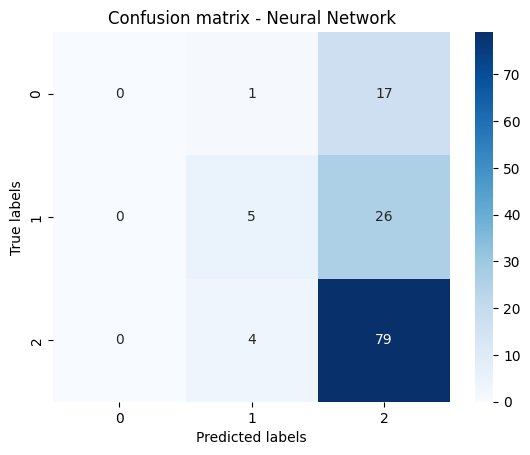

In [108]:
# Generate confusion matrix
cm_nn = confusion_matrix(y_test_labels, y_pred_labels)


# Print confusion matrix
print("Confusion Matrix - neural networks :")
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - Neural Network')
plt.show()

## Comparing models 

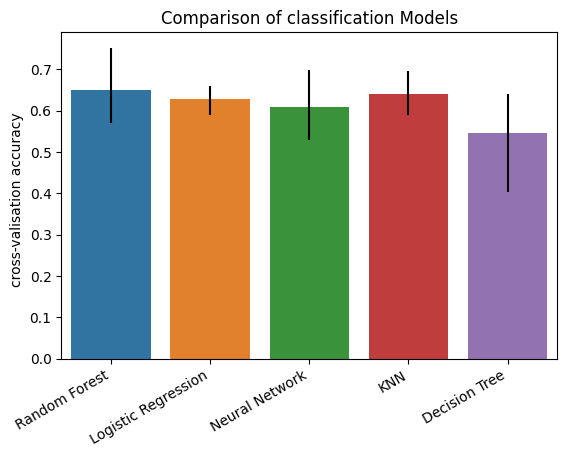

In [109]:
# on calcule le mean , max , min pour chaque cv_score

cv_results_dt_test_score = cv_results_dt['test_score']
cv_results_rf_test_score = cv_results_rf['test_score']
cv_results_lr_test_score = cv_results_lr['test_score']
cv_results_knn_test_score = cv_results_knn['test_score']


dt_median = np.median(cv_results_dt_test_score)
dt_min = np.min(cv_results_dt_test_score)
dt_max = np.max(cv_results_dt_test_score)

rf_median = np.median(cv_results_rf_test_score)
rf_min = np.min(cv_results_rf_test_score)
rf_max = np.max(cv_results_rf_test_score)


lin_median = np.median(cv_results_lr_test_score)
lin_min = np.min(cv_results_lr_test_score)
lin_max = np.max(cv_results_lr_test_score)

nn_median = np.median(cv_scores_nn)
nn_min = np.min(cv_scores_nn)
nn_max = np.max(cv_scores_nn)

rr_median = np.median(cv_results_knn_test_score)
rr_min = np.min(cv_results_knn_test_score)
rr_max = np.max(cv_results_knn_test_score)

# create a barplot of the results
fig = plt.figure()
sns.barplot(
    x=['Random Forest', 'Logistic Regression', 'Neural Network', 'KNN', 'Decision Tree'],
    y=[rf_median, lin_median, nn_median, rr_median ,  dt_median],
    yerr=np.array([[rf_median - rf_min, lin_median - lin_min, nn_median - nn_min, rr_median - rr_min, dt_median - dt_min],
        [rf_max - rf_median, lin_max - lin_median, nn_max - nn_median, rr_max - rr_median , dt_max - dt_median ]
    ]),
    capsize=10
)
fig.autofmt_xdate()
plt.title('Comparison of classification Models')
plt.ylabel('cross-valisation accuracy  ')
plt.show()

## accuracy on test data

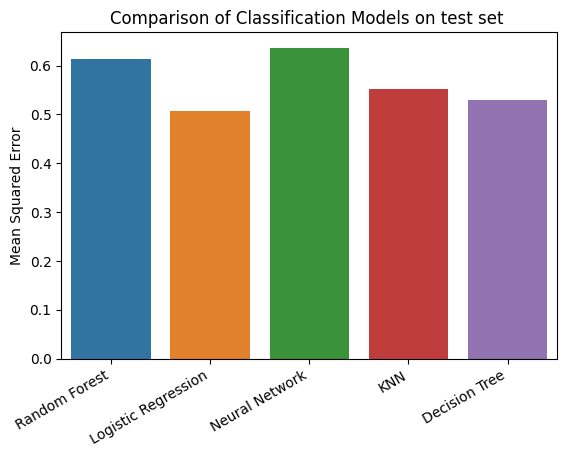

In [110]:
fig = plt.figure()
sns.barplot(x=['Random Forest', 'Logistic Regression', 'Neural Network', 'KNN','Decision Tree'],
            y = [accuracy_rf, accuracy_lr , accuracy , knn_accuracy , accuracy_dt],
              capsize=10
)
fig.autofmt_xdate()
plt.title('Comparison of Classification Models on test set ')
plt.ylabel('Mean Squared Error')
plt.show()